# Assess the variance

## Setup

In [1]:
import os
import numpy as np
import pandas as pd
import imageio
import json
import matplotlib.pyplot as plt
from amftrack.util.sys import storage_path
from amftrack.util.image_analysis import convert_to_micrometer

/home/felix/Wks/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# I/ Variance on x100 measurements

The goal of this notebook is to have an approximation of the variance of my measures of width.
We still don't know the bias, but we can at least have an approximation of the standard deviation of the measuring process.\
Data:\
For 3 hyphas we took 10 independent pictures (refocussed each time) and measured the width on each image in the same location.\
There is a small hypha (0), a medium (1) and a thick hypha (2).

We take as an estimation of the SD, the mean of the experimental SD of the three points.

## 1/ Retrieve the widths

In [2]:
directory_path = os.path.join(storage_path, "plate931-measuring-my-error")
sub_directory = ["error_margin_1", "error_margin_2", "error_margin_3"]

In [3]:
def is_valid(name):
    return ".json" in name

In [4]:
def fetch_data():
    d = {}
    for i, sub_dir in enumerate(sub_directory):
        sub_directory_path = os.path.join(directory_path, sub_dir)
        d[f"hypha{i}"] = []
        for file in os.listdir(sub_directory_path):
            if is_valid(file):
                path = os.path.join(sub_directory_path, file)
                with open(path) as f:
                    json_from_file = json.load(f)

                for shape in json_from_file["shapes"]:
                    if shape["label"] == "width":
                        point1 = shape["points"][0]
                        point2 = shape["points"][1]
                        width_pix = np.linalg.norm(np.array(point1) - np.array(point2))
                        width_micro = convert_to_micrometer(
                            width_pix, magnification=100
                        )
                        d[f"hypha{i}"].append(width_micro)
    return d

In [5]:
d = fetch_data()

In [6]:
d

{'hypha0': [2.7616341409467817,
  3.1920062054065816,
  3.2629037336329314,
  2.95462569869528,
  2.746039377283966,
  2.7389408995349553,
  2.672114491304291,
  2.695475175132031,
  2.8685699741183814,
  2.5898305392867353],
 'hypha1': [4.965420560747658,
  4.831131311821912,
  4.809748696756577,
  4.776996794302995,
  4.768375178626406,
  4.64622771719166,
  4.342867452324414,
  4.985475598415686,
  4.779777003305683,
  4.813366805054443],
 'hypha2': [6.420452920353775,
  6.278772871307923,
  6.668000555260827,
  6.471591639396562,
  7.058323883895551,
  6.3377854057846275,
  6.384980439015582,
  6.513192384424325,
  6.142320354199297,
  6.625436179622754]}

## 2/ Analysis of the variance

In [7]:
standard_deviations = []
mean = []
for i in range(3):
    key = f"hypha{i}"
    values = np.array(d[key])
    standard_deviations.append(np.std(values, ddof=1))
    mean.append(np.mean(d[key]))

In [8]:
standard_deviations

[0.2243204566243853, 0.17940890453640998, 0.2535150877937952]

In [10]:
SD = np.mean(standard_deviations)

In [11]:
SD.round(2)

0.22

## 3/ Plots

<IPython.core.display.Javascript object>


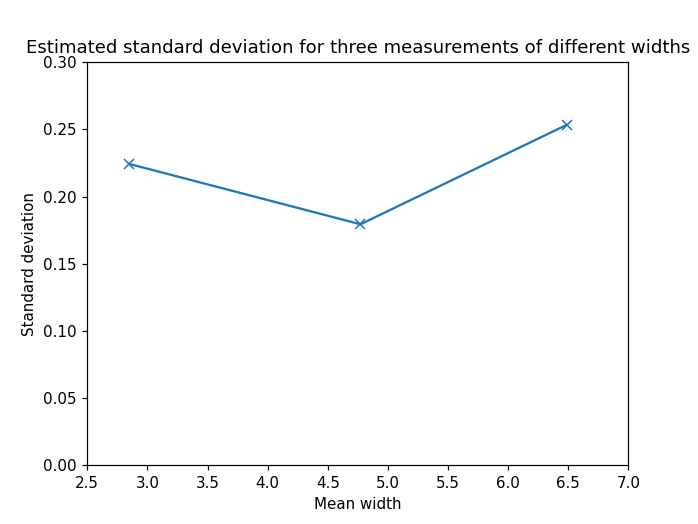

Text(0.5, 1.0, 'Estimated standard deviation for three measurements of different widths')

In [32]:
%matplotlib notebook
ax = plt.gca()
ax.set_ylim([0, 0.3])
# plt.errorbar(mean, mean, standard_deviations)
ax.set_xlim([2.5, 7])
plt.plot(mean, standard_deviations, marker = "x")
plt.plot()
plt.xlabel("Mean width")
plt.ylabel("Standard deviation")
plt.title("Estimated standard deviation for three measurements of different widths")

<IPython.core.display.Javascript object>


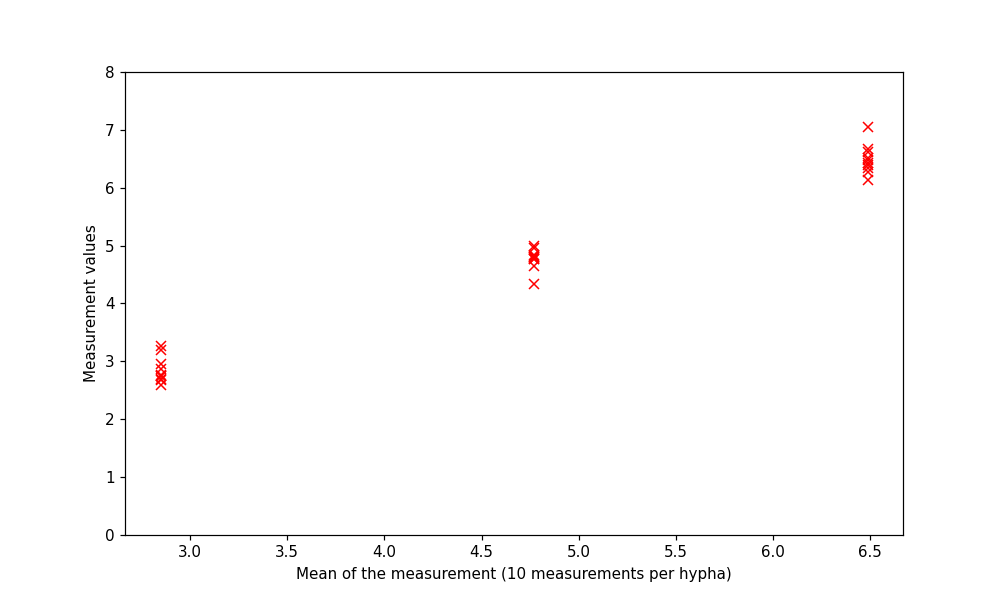

Text(0, 0.5, 'Measurement values')

In [33]:
ax = plt.gca()
ax.set_ylim([0, 8])
#plt.errorbar(mean, mean, standard_deviations)
plt.plot()
for i in range(3):
    for width in d[f"hypha{i}"]:
        plt.plot(mean[i], width, marker="x", color="red")
        
plt.xlabel("Mean of the measurement (10 measurements per hypha)")
plt.ylabel("Measurement values")

# II/ Variance on Prince images

The goal of this notebook is to have an approximation of the variance of my measures of width on Prince images.
Data:\
For 14 hyphas we did 10 independent measurements in the same location of Prince image.\

We take as an estimation of the SD, the mean of the experimental SD of the three points.

## 1/ Retrieve the widths

In [2]:
directory_path = os.path.join(storage_path, "measuring_my_error_prince_images")
labels = [f"segment{i}" for i in range(14)]

In [3]:
def is_valid(name):
    return ".json" in name

In [4]:
def fetch_data():
    d = {}
    segments = {}
    for i in range(1, 15):
        d[f"hypha{i}"] = []
        segments[f"hypha{i}"] = []
    for file in os.listdir(directory_path):
        if is_valid(file):
            path = os.path.join(directory_path, file)
            with open(path) as f:
                json_from_file = json.load(f)

            for shape in json_from_file["shapes"]:
                if "segment" in shape["label"]:
                    i = int(shape["label"][7:])
                    point1 = shape["points"][0]
                    point2 = shape["points"][1]
                    segments[f"hypha{i}"].append([point1, point2])
                    width_pix = np.linalg.norm(np.array(point1) - np.array(point2))
                    width_micro = convert_to_micrometer(
                        width_pix, magnification=2
                    )
                    d[f"hypha{i}"].append(width_micro)
    return d, segments

In [5]:
d, segments = fetch_data()

## 2/ Analysis of the variance

In [6]:
standard_deviations = []
mean = []
for i in range(1, 15):
    key = f"hypha{i}"
    values = np.array(d[key])
    standard_deviations.append(np.std(values, ddof=1))
    mean.append(np.mean(d[key]))

In [7]:
standard_deviations

[0.6734112208863859,
 0.2880238972053571,
 0.5913338430381698,
 0.4389591503143061,
 0.3491469051025385,
 0.3022141831342225,
 0.3498194997657256,
 0.21980493431190096,
 0.34750168416347343,
 0.28896355316294065,
 0.4913049638566373,
 0.4388831580707086,
 0.5587988389318337,
 0.33163071904805225]

In [8]:
SD = np.mean(standard_deviations)

In [9]:
SD.round(2)

0.4

## 3/ Plots

Text(0.5, 1.0, 'Estimated standard deviation of width measurement for several hypha on Prince images')

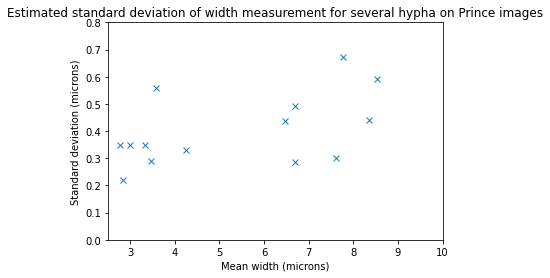

In [10]:
#%matplotlib notebook
ax = plt.gca()
ax.set_ylim([0, 0.8])
# plt.errorbar(mean, mean, standard_deviations)
ax.set_xlim([2.5, 10])
plt.plot(mean, standard_deviations, marker = "x", linestyle = 'None')
plt.plot()
plt.xlabel("Mean width (microns)")
plt.ylabel("Standard deviation (microns)")
plt.title("Estimated standard deviation of width measurement for several hypha on Prince images")

Text(0, 0.5, 'Measurement values')

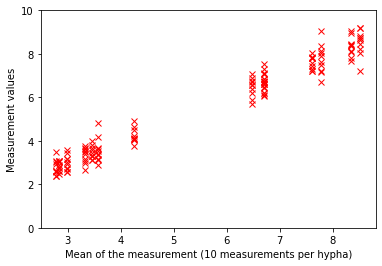

In [11]:
ax = plt.gca()
ax.set_ylim([0, 10])
#plt.errorbar(mean, mean, standard_deviations)
plt.plot()
for i in range(1, 15):
    for width in d[f"hypha{i}"]:
        plt.plot(mean[i-1], width, marker="x", color="red")
        
plt.xlabel("Mean of the measurement (10 measurements per hypha)")
plt.ylabel("Measurement values")

Conclusion: standard deviation is more or less constant and the mean value is 0.4 microns

### 4/ Visualize some hyphas

In [12]:
correspondance = {1: "image_01_01.tif", 2: "image_01_01.tif", 3: "image_01_01.tif", 4: "image_02_01.tif",
                 5: "image_02_01.tif", 6: "image_02_01.tif", 7: "image_03_01.tif", 8: "image_03_01.tif",
                 9: "image_03_01.tif", 10: "image_04_01.tif", 11: "image_04_01.tif", 12: "image_04_01.tif",
                 13: "image_04_01.tif", 14: "image_04_01.tif"}

In [13]:
print(mean)

[7.769169115324784, 6.702220798822974, 8.52230972844033, 8.3411769779762, 3.3324791701961574, 7.6121917378479536, 2.9882791763530023, 2.840958744291526, 2.7774514300978503, 3.463233324286642, 6.69513204606463, 6.472484379371329, 3.5685225544820733, 4.253703117233889]


In [30]:
i = 3
print(mean[i-1])
im_path = os.path.join(directory_path, correspondance[i])
image = imageio.imread(im_path)
p1 = segments[f"hypha{i}"][0][0]
p2 = segments[f"hypha{i}"][0][1]

<IPython.core.display.Javascript object>


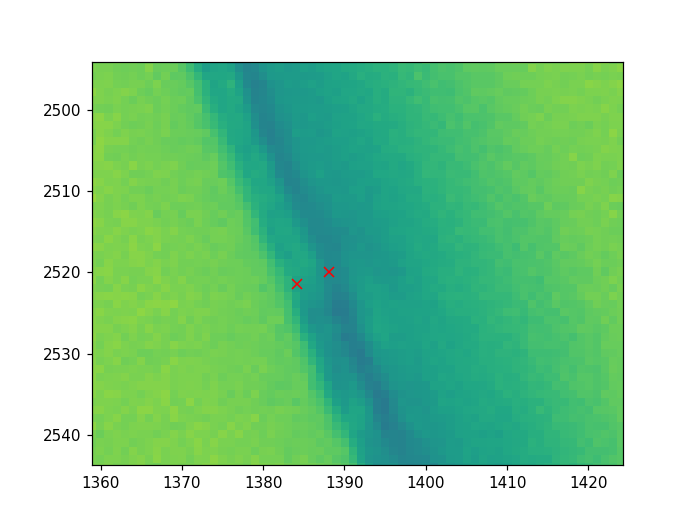

In [27]:
%matplotlib notebook
plt.imshow(image)
plt.plot(p1[0], p1[1], marker = "x", color = "red")
plt.plot(p2[0], p2[1], marker = "x", color = "red")

In [35]:
i = 13
print(mean[i-1])
im_path = os.path.join(directory_path, correspondance[i])
image = imageio.imread(im_path)
p1 = segments[f"hypha{i}"][1][0]
p2 = segments[f"hypha{i}"][1][1]

3.5685225544820733


<IPython.core.display.Javascript object>


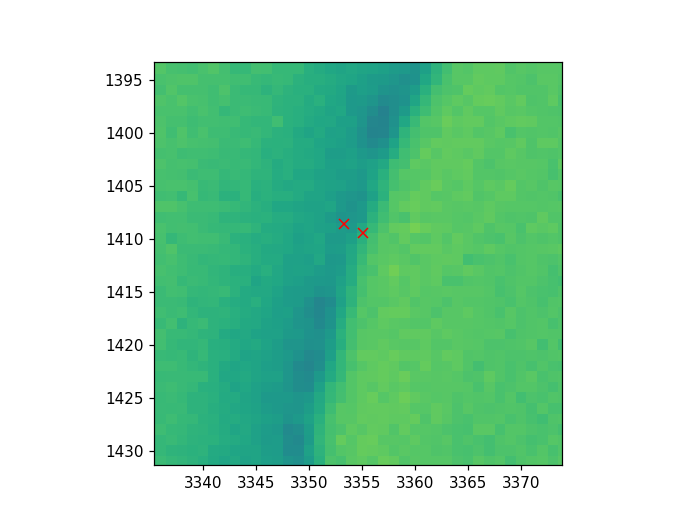

In [36]:
%matplotlib notebook
plt.imshow(image)
plt.plot(p1[0], p1[1], marker = "x", color = "red")
plt.plot(p2[0], p2[1], marker = "x", color = "red")